# **Machine Learning Final Project**


### Ron Keinan 203735857






____________________________________________________________________________________________________________________________________________________________________________________

Note book # 5 - In this notebook I will classify df with 6 imbalanced classes in the same way of notebook #1m with Random Under sampling. I

# **Data preperation**


##### **Downloading the data set**

In [ ]:
import os
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Alignment, Border, Side
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from string import punctuation
import numpy as np
import math
import seaborn as sns

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
%matplotlib inline

import time
t1 = time.perf_counter()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = '/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/'
full_data = pd.read_excel(data_path+'camoni full comments.xlsx')
full_data['Community'].value_counts()

דיכאון וחרדה                62221
הפרעות אכילה                36950
ער"ן - עזרה ראשונה נפשית    35618
טרשת נפוצה                  21422
כאב                         15715
קרוהן וקוליטיס              15179
סוכרת סוג-2                 14715
תרופות ורוקחות              13057
כליות ודיאליזה              10557
חוט שדרה                     6831
נשימה                        5433
קשב וריכוז                   5210
השמנה                        5202
מחלות לב                     5124
אוסטאופורוזיס                4715
לחץ דם                       3922
סרטן                         3501
מפרקים                       3438
גמילה מעישון                 3391
זכויות החולה                 2681
אירוע מוחי                   2475
שלפוחית רגיזה                2258
פסוריאזיס                    2181
סרטן השד                     1765
מיאלומה נפוצה                1705
סיוגרן (sjogren)             1359
מושתלים                       888
בני משפחה מטפלים              851
טראומה מטרור ומלחמה           828
בעיות גדילה   

In [ ]:
data = full_data[full_data['Community'].isin(['הידרדניטיס סופורטיבה', 'סרטן הריאות', 'אטופיק דרמטיטיס', 'גמילה מעישון'])]

In [ ]:
data['Community'] = data['Community'].replace('סרטן הריאות', 'lung cancer')
data['Community'] = data['Community'].replace('הידרדניטיס סופורטיבה','hydradenitis suppurativa')
data['Community'] = data['Community'].replace('אטופיק דרמטיטיס', 'atopic dermatitis')
data['Community'] = data['Community'].replace('גמילה מעישון', 'smoking cessation')

<ipython-input-42-eb28f91f53d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-eb28f91f53d5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-eb28f91f53d5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-eb28f91

In [ ]:
data

,Date,Time,Community,Comment author,Comment,Post/Comment
82073,30/12/14,11:21,smoking cessation,"ד""ר יעל בר-זאב\n\n",\nשלום לכולם וברוכים הבאים לקהילת כמוני לגמילה...,post
82178,31/12/14,14:14,smoking cessation,מעשנת\n,\nשלום!\nהתפתיתי לתכנית דיקור ותוספים נגד עישו...,post
82179,31/12/14,16:50,smoking cessation,"ד""ר יעל בר-זאב\n",שלום וברוכה הבאה לקהילה.\nראשית כל הכבוד על כך...,comment
82192,31/12/14,15:27,smoking cessation,ד.\n,\nהאם טיפול בהיפנוזה אפקטיבי להפסקת עישון של מ...,post
82193,31/12/14,16:47,smoking cessation,"ד""ר יעל בר-זאב\n",שלום וברוכה הבאה לקהילה.\nמסקירת מחקרים בתחום ...,comment
...,...,...,...,...,...,...
293068,31/12/21,11:35,atopic dermatitis,Lucky22\n\n,\nכבר שנים אני סובל מאטופיק דרמטיטיס (מאז שעלי...,post
293069,01/01/22,07:41,atopic dermatitis,פרופ' דני בן אמתי\n,יש אבחנה מבדלת למצב אותו אתה מתאר.\nהאם נלקחו ...,comment
293070,01/01/22,19:30,atopic dermatitis,Lucky22\n,"לא נעשה שום דבר. רופא עור הסתכל, אמר שלדעתו לא...",comment
293348,05/01/22,17:22,atopic dermatitis,פינחס1\n\n,\nלפני כחודש וחצי נחשף במשפחתנו ילד חולה סקביא...,post


In [ ]:
data['Community'].value_counts()

smoking cessation           3391
atopic dermatitis            498
lung cancer                  472
hydradenitis suppurativa     197
Name: Community, dtype: int64

# Data Exploration

In [ ]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

4558
['Date', 'Time', 'Community', 'Comment author', 'Comment', 'Post/Comment']
Date              object
Time              object
Community         object
Comment author    object
Comment           object
Post/Comment      object
dtype: object


In [ ]:
data['Community'].value_counts()

smoking cessation           3391
atopic dermatitis            498
lung cancer                  472
hydradenitis suppurativa     197
Name: Community, dtype: int64

In [ ]:
data.groupby('Community').describe()

Date                        Time                     \
                         count unique       top freq count unique    top freq   
Community                                                                       
atopic dermatitis          498    252  28/10/20   11   498    396  10:25    4   
hydradenitis suppurativa   197    131  18/02/20    6   197    181  11:13    2   
lung cancer                472    285  14/02/17    8   472    354  10:31    5   
smoking cessation         3391   1125  22/06/17   19  3391   1132  19:01   10   

                         Comment author                                   \
                                  count unique                  top freq   
Community                                                                  
atopic dermatitis                   498    181  פרופ' דני בן אמתי\n  105   
hydradenitis suppurativa            197     87    ד"ר אריאלה הפנר\n   33   
lung cancer                         472    194       ד"ר אמיר און\n  104   
smoking cessation                  3391    513     ד"ר יעל בר-זאב\n  589   

                         Comment         \
                           count unique   
Community                                 
atopic dermatitis            498    488   
hydradenitis suppurativa     197    196   
lung cancer                  472    469   
smoking cessation           3391   3345   

                                                                             \
                                                                        top   
Community                                                                     
atopic dermatitis                                                  תודה\n\n   
hydradenitis suppurativa  שלום לך דייב! הנה מוזמן לקרוא על כך בפירוט בקי...   
lung cancer                                                          \n\n\n   
smoking cessation                                                    \n\n\n   

                              Post/Comment                        
                         freq        count unique      top  freq  
Community                                                         
atopic dermatitis           5          498      2  comment   366  
hydradenitis suppurativa    2          197      2  comment   123  
lung cancer                 2          472      2  comment   297  
smoking cessation          10         3391      2  comment  2916

Text(0, 0.5, 'feature amount')

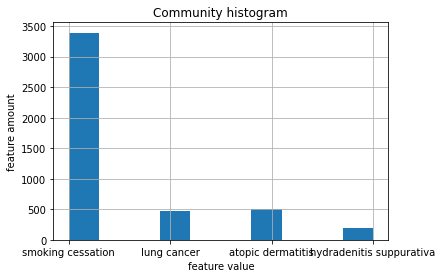

In [ ]:
hist1=data['Community'].hist()
hist1.set_title('Community histogram')
hist1.set_xlabel("feature value")
hist1.set_ylabel("feature amount")

In [ ]:
import plotly.express as px
fig = px.pie(data, names='Community', title ='Pie chart of different communities of posts')
fig.show()

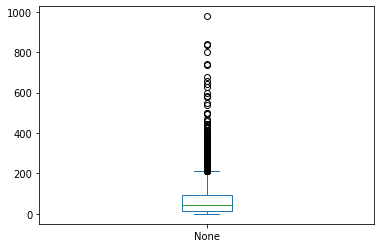

In [ ]:
# Calculate post lengths
post_len = pd.Series([len(post.split()) for post in data['Comment']])

# The distribution of tweet text lengths
post_len.plot(kind='box')

<ipython-input-51-c360206ecba6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



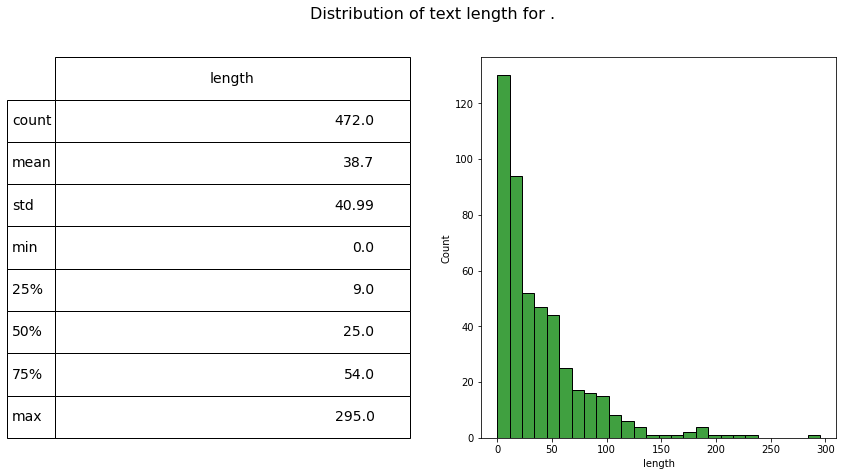

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='lung cancer']['length'], ax=ax1,color='green')
describe = data.length[data.Community=='lung cancer'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)

plt.show()

<ipython-input-52-aaf3807f2125>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



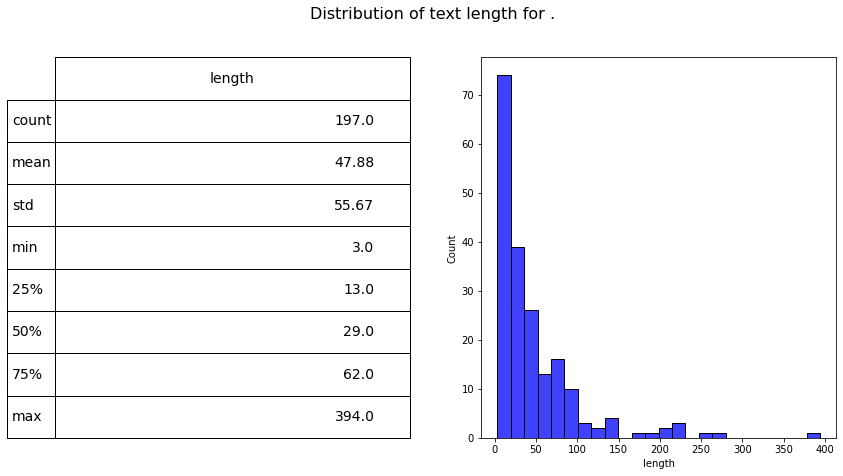

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='hydradenitis suppurativa']['length'], ax=ax1,color='blue')
describe = data.length[data.Community=='hydradenitis suppurativa'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)
plt.show()

<ipython-input-53-7ef7c1aad856>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



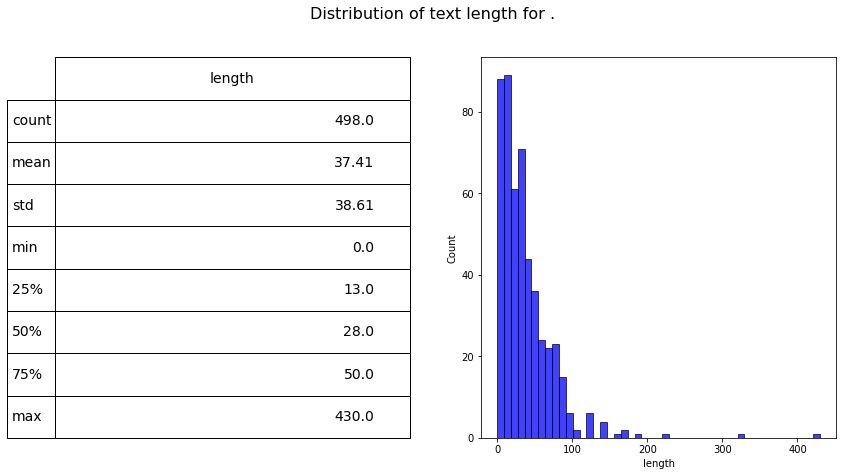

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='atopic dermatitis']['length'], ax=ax1,color='blue')
describe = data.length[data.Community=='atopic dermatitis'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)
plt.show()

<ipython-input-54-a4c7e5c828d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



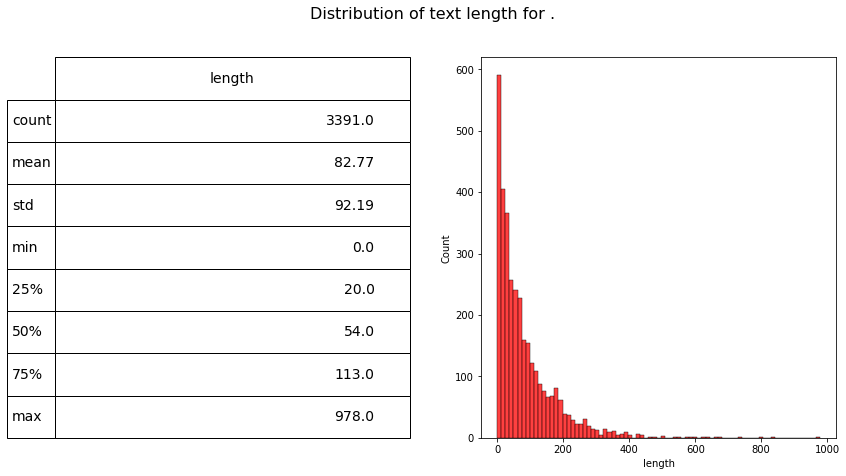

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='smoking cessation']['length'], ax=ax1,color='red')
describe = data.length[data.Community=='smoking cessation'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)
plt.show()

# Data Pre processing

In [ ]:
STOP_WORDS = open('/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/heb_stopwords.txt', "r")
STOP_WORDS = STOP_WORDS.read()
STOP_WORDS = STOP_WORDS.split("\n")
print(STOP_WORDS[:10])

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם']


In [ ]:
import re
def pre_process_text(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # remove stop words
    text_ = [word for word in text.split() if word not in STOP_WORDS]

    # remove not hebrew letters
    my_word = re.sub(r'[^אבגדהוזחטיכלמנסעפצקרשתםןץףך]{3,}', ' ', ' '.join(text_))
    my_word2 = re.sub(r'(\s)([אבגדהוזחטיכלמנסעפצקרשתםןץףך])(\s)', ' ', my_word)

    return my_word2

In [ ]:
basic_texts = data['Comment']
labels = data['Community']

In [ ]:
basic_texts[:10]

82073    \nשלום לכולם וברוכים הבאים לקהילת כמוני לגמילה...
82178    \nשלום!\nהתפתיתי לתכנית דיקור ותוספים נגד עישו...
82179    שלום וברוכה הבאה לקהילה.\nראשית כל הכבוד על כך...
82192    \nהאם טיפול בהיפנוזה אפקטיבי להפסקת עישון של מ...
82193    שלום וברוכה הבאה לקהילה.\nמסקירת מחקרים בתחום ...
82194    פורום מבורך, אני בת 64 מעשנת מגיל 18, חפיסה בי...
82195    בוקר טוב העובדה שאת רוצה היא התחלה טובה, קודם ...
82243    \nביחד עם קבוצת תמיכה יתכן שכן פשוט להפסיק לעש...
82244    אתה צודק, זה לא פשוט להיגמל מעישון. זה אפילו ק...
82245    הגורם לעישון הוא מתח.\nכל שיטת גמילה שהיא שלא ...
Name: Comment, dtype: object

In [ ]:
clean_texts = []
for text in basic_texts:
    clean_txt = pre_process_text(text)
    clean_texts.append(clean_txt)  # create pre-processed text list
# add to dataframe column with the clean text


In [ ]:
clean_texts[:10]

['וברוכים הבאים לקהילת כמוני לגמילה מעישון מיועדת שחושב שוקל מתעניין ואו להפסיק לעשן שנמצא כעת בתהליך הפסקת עישון הפסיק לעשן אותכם לשתף לספר לשאול שאלות ולתמוך בשני כמנהלת יחד שותפתי נילי בראון בשבילכם לעזרה מקצועית ולתמיכה בכם בתהליך',
 'התפתיתי לתכנית דיקור ותוספים עישון שמשהו קורה לצערי ידוע הצליח ממליצים מעשנת קופסא ',
 'וברוכה הבאה לקהילה ראשית ומנסה להפסיק לעשן הצעד והנכון לצערי שיטות דיקור ותוספים למינהם שיטות מוכחות להפסקת עישון מנגד קיימות שיטות יעילות ובטוחות שהוכחו במחקרים שאף תוכלי חינם בקופת החולים ממליצה להתקשר לקופה ולברר הסדנה הקרובה שנפתחת ולהירשם ואנחנו ולתמוך',
 'טיפול בהיפנוזה אפקטיבי להפסקת עישון מעשן כבד מבוגר שהעישון טבע',
 'וברוכה הבאה לקהילה מסקירת מחקרים בתחום הוכח שהיפנוזה יעילה לגמילה מעישון מנגד קיימות שיטות שהוכחו כיעילות ובטוחות לעשנים כבדים שיטות כוללות ייעוץ קוגנטיבי התנהגותי המשולב בטיפול תרופתי ייעוץ בסדנה קבוצתית הקופות חינם בחלק מהקופות כללית ומכבי באמצעות הפנייה מרופא המשפחה הייעוץ בטלפון',
 'מבורך מעשנת מגיל חפיסה מצליחה להיגמל מעישון באלן קאר אבר

# Data Preperation - tf-idf model

TF-IDF (term frequency-inverse document frequency) is a method used to quantify the importance of a word in a document within a collection of documents. It is commonly used in text classification and information retrieval tasks.

In the TF-IDF method, the importance of a word in a document is determined by two factors: its term frequency (TF) and its inverse document frequency (IDF). TF is the number of times a word appears in a document, and IDF is the logarithmically scaled inverse fraction of the documents that contain the word. The product of TF and IDF is the TF-IDF weight of a word in a document.

Once the TF-IDF weights of all the words in a document have been calculated, they can be used as features in a machine learning classifier. Classic machine learning classifiers such as Naive Bayes, SVM, decision trees, etc. can then be trained on these features to classify texts into different categories.

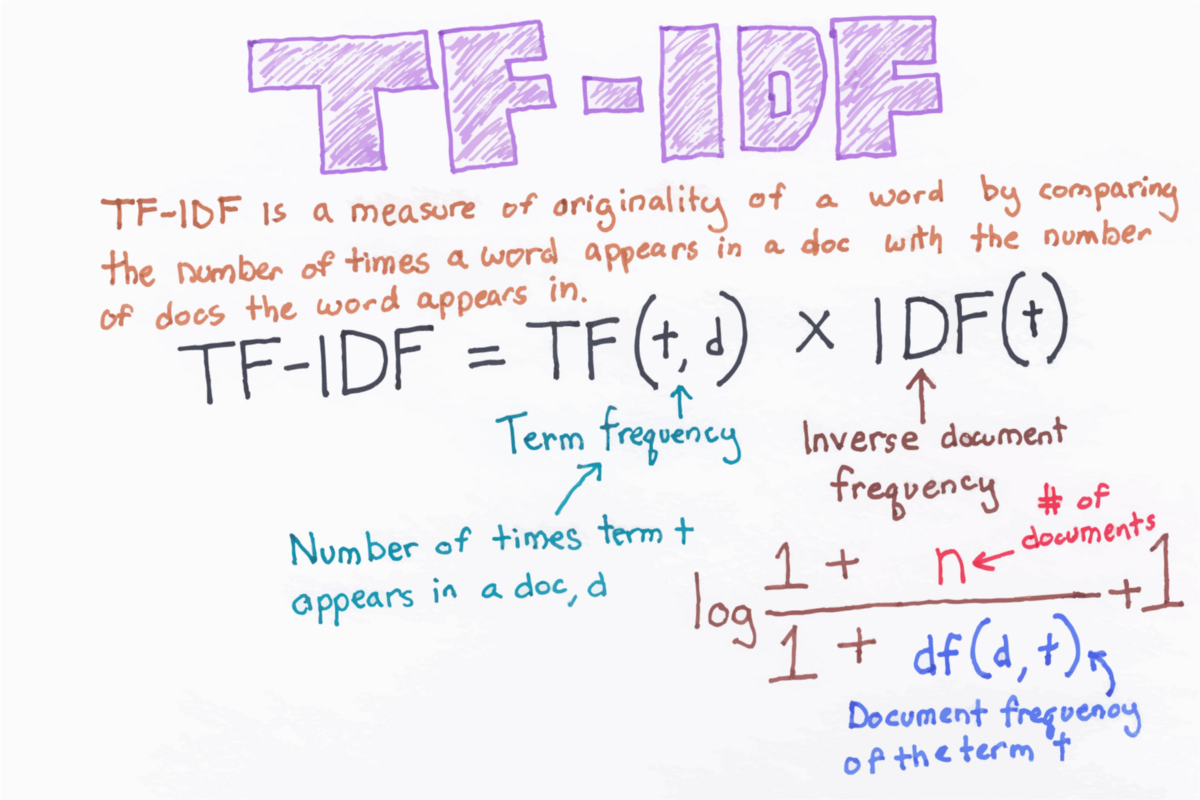

In [ ]:
ANALYZER_SIZE_LIST = [['word', 1],
                      ['word', 2], 
                      #['word', 3]
                      ]
texts = clean_texts


# Feature selection - tf-idf model

In [ ]:
TERM_NUMBER_LIST = [500, 1000, 4000, 10000]

CLASSIFIERS = {
               'Logistic Regression': LogisticRegression(),
               'Multinomial Naive Bayes': MultinomialNB(),

               'Support Vector Machine': SVC(),
               'Desicion Tree': DecisionTreeClassifier(),

                # Bagging
               'Bagging Classifier DT - Random Forest': RandomForestClassifier(),
               'Bagging Classifier SVM': BaggingClassifier(base_estimator = SVC()),
               'Bagging Classifier LR': BaggingClassifier(base_estimator = LogisticRegression()),

               # Boosting
               'Gradient Boosting DT': GradientBoostingClassifier(),

                # Stacking
                'Stacking LR+SVC+DT+MNB': VotingClassifier(estimators = [('LR', LogisticRegression()),
                                                           ('SVC', SVC()),
                                                           ('DT', DecisionTreeClassifier()),
                                                           ('MNB', MultinomialNB())
                                                           ]),
               # Deep Learning
               'Multi-layer Perceptron': MLPClassifier(),
               }


MIN_NUMBER_OF_TEXTS = 3

In [ ]:
def TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size, min_text_number):
    term_number_list = [str(term) for term in TERM_NUMBER_LIST]
    model_results_dict_accuracy = {'term type': str(size) + " - " + analyze_type,
                             'model': model_name, 'measure': 'accuracy',
                             **dict.fromkeys(term_number_list, 0)}

    for terms_number in TERM_NUMBER_LIST:
        vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
        response = vectorizer.fit_transform(texts)
        X_train, X_test, y_train, y_test = train_test_split(response, labels, test_size=0.25, random_state=42)

        # train the classifier
        model.fit(X_train, y_train)
        # predict the response for new texts
        predictions = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='macro', zero_division=0)

        model_results_dict_accuracy[str(terms_number)] = round(accuracy, 8)

    return model_results_dict_accuracy

In [ ]:
term_number_list = [str(term) for term in TERM_NUMBER_LIST]
model_results_df = pd.DataFrame(
        columns=['term type', 'model', 'measure', *term_number_list])

for analyze_type, size in ANALYZER_SIZE_LIST:
    for model_name, model in CLASSIFIERS.items():
        measuers_list = TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS)
        model_results_df = model_results_df.append(measuers_list, ignore_index=True)
        print("finished model: " + model_name + " analyzer: " + analyze_type + " " + str(
                    size) + " min text number: " + str(MIN_NUMBER_OF_TEXTS))

# create a new Excel file and add a sheet for each ngram with the results for each model
file_name = ' models results - ' + 'with min text number ' + str(MIN_NUMBER_OF_TEXTS) + '.xlsx'



finished model: Logistic Regression analyzer: word 1 min text number: 3
finished model: Multinomial Naive Bayes analyzer: word 1 min text number: 3
finished model: Support Vector Machine analyzer: word 1 min text number: 3
finished model: Desicion Tree analyzer: word 1 min text number: 3
finished model: Bagging Classifier DT - Random Forest analyzer: word 1 min text number: 3
finished model: Bagging Classifier SVM analyzer: word 1 min text number: 3
finished model: Bagging Classifier LR analyzer: word 1 min text number: 3
finished model: Gradient Boosting DT analyzer: word 1 min text number: 3
finished model: Stacking LR+SVC+DT+MNB analyzer: word 1 min text number: 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



finished model: Multi-layer Perceptron analyzer: word 1 min text number: 3
finished model: Logistic Regression analyzer: word 2 min text number: 3
finished model: Multinomial Naive Bayes analyzer: word 2 min text number: 3
finished model: Support Vector Machine analyzer: word 2 min text number: 3
finished model: Desicion Tree analyzer: word 2 min text number: 3
finished model: Bagging Classifier DT - Random Forest analyzer: word 2 min text number: 3
finished model: Bagging Classifier SVM analyzer: word 2 min text number: 3
finished model: Bagging Classifier LR analyzer: word 2 min text number: 3
finished model: Gradient Boosting DT analyzer: word 2 min text number: 3
finished model: Stacking LR+SVC+DT+MNB analyzer: word 2 min text number: 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



finished model: Multi-layer Perceptron analyzer: word 2 min text number: 3


In [ ]:
model_results_df

,term type,model,measure,500,1000,4000,10000
0,1 - word,Logistic Regression,accuracy,0.852632,0.864912,0.874561,0.860526
1,1 - word,Multinomial Naive Bayes,accuracy,0.846491,0.860526,0.872807,0.836842
2,1 - word,Support Vector Machine,accuracy,0.840351,0.856140,0.868421,0.849123
3,1 - word,Desicion Tree,accuracy,0.800877,0.826316,0.836842,0.858772
4,1 - word,Bagging Classifier DT - Random Forest,accuracy,0.851754,0.869298,0.897368,0.896491
5,1 - word,Bagging Classifier SVM,accuracy,0.844737,0.849123,0.851754,0.833333
6,1 - word,Bagging Classifier LR,accuracy,0.848246,0.858772,0.862281,0.842982
7,1 - word,Gradient Boosting DT,accuracy,0.835965,0.853509,0.862281,0.864912
8,1 - word,Stacking LR+SVC+DT+MNB,accuracy,0.850000,0.866667,0.872807,0.866667
9,1 - word,Multi-layer Perceptron,accuracy,0.831579,0.850000,0.911404,0.927193


### Choose best max features for every row (analyzer and classifier)

In [ ]:
df = model_results_df
columns_of_results = len(TERM_NUMBER_LIST)
# select the last 4 columns
last_4_cols = model_results_df.iloc[:, -1*columns_of_results:]

# find the column name of the max value in each row
max_col = last_4_cols.idxmax(axis=1)

# find the max value in each row
max_val = last_4_cols.max(axis=1)

# create a new dataframe with all columns except the last 4
new_model_results_df = model_results_df.iloc[:, :-1*columns_of_results]

# add the max value and column name as new columns
new_model_results_df['max measure'] = max_val
new_model_results_df['max features'] = max_col

In [ ]:
new_model_results_df.sort_values(by='term type', ascending=False)

,term type,model,measure,max measure,max features
10,2 - word,Logistic Regression,accuracy,0.871930,4000
11,2 - word,Multinomial Naive Bayes,accuracy,0.871053,4000
18,2 - word,Stacking LR+SVC+DT+MNB,accuracy,0.873684,4000
17,2 - word,Gradient Boosting DT,accuracy,0.864035,10000
16,2 - word,Bagging Classifier LR,accuracy,0.862281,4000
15,2 - word,Bagging Classifier SVM,accuracy,0.848246,1000
14,2 - word,Bagging Classifier DT - Random Forest,accuracy,0.896491,10000
13,2 - word,Desicion Tree,accuracy,0.859649,10000
12,2 - word,Support Vector Machine,accuracy,0.865789,4000
19,2 - word,Multi-layer Perceptron,accuracy,0.924561,10000


In [ ]:
new_model_results_df.sort_values(by='max measure', ascending=False)

,term type,model,measure,max measure,max features
9,1 - word,Multi-layer Perceptron,accuracy,0.927193,10000
19,2 - word,Multi-layer Perceptron,accuracy,0.924561,10000
4,1 - word,Bagging Classifier DT - Random Forest,accuracy,0.897368,4000
14,2 - word,Bagging Classifier DT - Random Forest,accuracy,0.896491,10000
0,1 - word,Logistic Regression,accuracy,0.874561,4000
18,2 - word,Stacking LR+SVC+DT+MNB,accuracy,0.873684,4000
8,1 - word,Stacking LR+SVC+DT+MNB,accuracy,0.872807,4000
1,1 - word,Multinomial Naive Bayes,accuracy,0.872807,4000
10,2 - word,Logistic Regression,accuracy,0.871930,4000
11,2 - word,Multinomial Naive Bayes,accuracy,0.871053,4000


In [ ]:
new_model_results_df.sort_values(by='model', ascending=False)

,term type,model,measure,max measure,max features
2,1 - word,Support Vector Machine,accuracy,0.868421,4000
12,2 - word,Support Vector Machine,accuracy,0.865789,4000
8,1 - word,Stacking LR+SVC+DT+MNB,accuracy,0.872807,4000
18,2 - word,Stacking LR+SVC+DT+MNB,accuracy,0.873684,4000
11,2 - word,Multinomial Naive Bayes,accuracy,0.871053,4000
1,1 - word,Multinomial Naive Bayes,accuracy,0.872807,4000
19,2 - word,Multi-layer Perceptron,accuracy,0.924561,10000
9,1 - word,Multi-layer Perceptron,accuracy,0.927193,10000
0,1 - word,Logistic Regression,accuracy,0.874561,4000
10,2 - word,Logistic Regression,accuracy,0.871930,4000


# Parameter Tuning for the best models - tf-idf model

In [ ]:
def get_best_parameters(classifier, X_train, y_train):
    # create a dictionary with the parameters to test
    classifier_name = classifier.__class__.__name__
    parameters={}
    if classifier_name == 'LogisticRegression':
        parameters = {'C': [0.1, 1, 10],
                      'penalty': ['l1', 'l2', 'elasticnet'],
                      'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'SVC':
        parameters = {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                      'gamma': ['scale', 'auto'],
                      'degree': [1,2,3],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'RandomForestClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                    }                 
    elif classifier_name == 'MLPClassifier':
        parameters = {'hidden_layer_sizes': [(1,), (10,), (100,)],
                      'activation': ['logistic', 'tanh', 'relu'],
                      'solver': ['lbfgs', 'sgd', 'adam'],
                      'alpha': [0.001, 0.01],
                      'max_iter': [1000],
                      'early_stopping': [True]
                      }
    elif classifier_name == 'KNeighborsClassifier':
        parameters = {'n_neighbors': [1, 11, 101],
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      }
    elif classifier_name == 'DecisionTreeClassifier':
        parameters = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                      }
    elif classifier_name == 'MultinomialNB':
        parameters = {'alpha': [0.01, 0.1, 1, 10],
                      'fit_prior': [True, False]
                      }
    elif classifier_name == 'AdaBoostClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'learning_rate': [0.01, 0.1]
                      }
    elif classifier_name == 'BaggingClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'max_samples': [None, 0.5, 0.7],
                      'max_features': [None, 0.5, 0.7],
                      'n_jobs': [-1]
                      }
    elif classifier_name == 'GradientBoostingClassifier':
        parameters = { 'loss': ['log_loss', 'deviance', 'exponential'],
                'learning_rate': [0.001, 0.1],
                "max_features":["log2","sqrt"],
                "n_estimators":[50, 100, 200]}
    elif classifier_name =='VotingClassifier':
      parameters = { 'voting': ['hard', 'soft'],
                     'n_jobs': [-1]       
                    }
                
    # create a grid search object and fit it to the data
    grid_obj = GridSearchCV(estimator=classifier, 
                            param_grid=parameters, 
                            scoring='accuracy',
                            cv=5, 
                            verbose=2, 
                            n_jobs = -1
                            )
    grid_obj = grid_obj.fit(X_train, y_train)

    # return best parameters
    return grid_obj.best_params_, grid_obj.best_estimator_

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': round(accuracy_score(y_true, y_pred), 4),
                      'precision': round(precision_score(y_true, y_pred, average = 'weighted'), 4),
                      'recall': round(recall_score(y_true, y_pred, average = 'weighted'), 4),
                      'f1': round(f1_score(y_true, y_pred, average = 'weighted'), 4)},
                      name=label)

In [ ]:
def TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size, min_text_number, terms_number):
    vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
    response = vectorizer.fit_transform(texts)

    best_params, best_classifier = get_best_parameters(model, response, labels)

    X_train, X_test, y_train, y_test = train_test_split(response, labels, test_size=0.25, random_state=42)

    model.fit(X_train, y_train)
    y_train_pred_gr = best_classifier.predict(X_train)
    y_test_pred_gr = best_classifier.predict(X_test)

    from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_test_pred_gr, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    measures1 = measure_error(y_train, y_train_pred_gr, 'train')
    measures2 = measure_error(y_test, y_test_pred_gr, 'test')

    
    return best_params, measures1, measures2, cm, disp, model

In [ ]:
best_params_list = []
best_accuracy_train  = []
best_accuracy_test = []
best_precision_train = []
best_precision_test  = []
best_recall_train = []
best_recall_test = []
best_f1_train  = []
best_f1_test = []
conf_matrices = []
conf_matrices_display = []
models = []

for index, row in new_model_results_df.iterrows():
  
    model_name = row['model']
    model = CLASSIFIERS[model_name]
    term_type = row['term type'].split(" - ")

    analyze_type = term_type[1]
    size = int(term_type[0])
    terms_number = int(row['max features'])

    print(model_name)

    best_params, measures_train, measures_test, cm, disp, model = TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS, terms_number)
    best_params_list.append(best_params)
    best_accuracy_train.append(measures_train['accuracy'])
    best_accuracy_test.append(measures_test['accuracy'])
    best_precision_train.append(measures_train['precision'])
    best_precision_test.append(measures_test['precision'])
    best_recall_train.append(measures_train['recall'])
    best_recall_test.append(measures_test['recall'])
    best_f1_train.append(measures_train['f1'])
    best_f1_test.append(measures_test['f1'])
    conf_matrices.append(cm)
    conf_matrices_display.append(disp)
    models.append(model)


new_model_results_df['best params'] = best_params_list
new_model_results_df['best accuracy train'] = best_accuracy_train
new_model_results_df['best accuracy test'] = best_accuracy_test
new_model_results_df['best precision train'] = best_precision_train
new_model_results_df['best precision test'] = best_precision_test
new_model_results_df['best recall train'] = best_recall_train
new_model_results_df['best recall test'] = best_recall_test
new_model_results_df['best f1 train'] = best_f1_train
new_model_results_df['best f1 test'] = best_f1_test
new_model_results_df['conf matrices'] = conf_matrices
new_model_results_df['conf matrices display'] = conf_matrices_display
new_model_results_df['model'] = models

Logistic Regression
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


165 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

Multinomial Naive Bayes
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Support Vector Machine
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Desicion Tree
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Bagging Classifier DT - Random Forest
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Bagging Classifier SVM
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 2

Bagging Classifier LR
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 327, in _fit
    if not (0 < max_samples <= X.shape[0]):
TypeErr

Gradient Boosting DT
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' n

Stacking LR+SVC+DT+MNB
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [0.86200556        nan]



Multi-layer Perceptron
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Logistic Regression
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


165 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

Multinomial Naive Bayes
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Support Vector Machine
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Desicion Tree
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Bagging Classifier DT - Random Forest
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Bagging Classifier SVM
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 327, in _fit
    if not (0 < max_samples <= X.shape[0]):
TypeErr

Bagging Classifier LR
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 327, in _fit
    if not (0 < max_samples <= X.shape[0]):
TypeErr

Gradient Boosting DT
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' n

Stacking LR+SVC+DT+MNB
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [0.86200628        nan]



Multi-layer Perceptron
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
new_model_results_df.drop('conf matrices', axis=1).drop('conf matrices display', axis=1).drop('model', axis=1)

,term type,measure,max measure,max features,best params,best accuracy train,best accuracy test,best precision train,best precision test,best recall train,best recall test,best f1 train,best f1 test
0,1 - word,accuracy,0.874561,4000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9813,0.9956,0.9816,0.9956,0.9813,0.9956,0.9810,0.9956
1,1 - word,accuracy,0.872807,4000,"{'alpha': 0.1, 'fit_prior': True}",0.9485,0.9754,0.9494,0.9758,0.9485,0.9754,0.9468,0.9749
2,1 - word,accuracy,0.868421,4000,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.9339,0.9526,0.9353,0.9531,0.9339,0.9526,0.9303,0.9506
3,1 - word,accuracy,0.858772,10000,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.9845,0.9982,0.9847,0.9982,0.9845,0.9982,0.9843,0.9982
4,1 - word,accuracy,0.897368,4000,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9819,0.9956,0.9822,0.9956,0.9819,0.9956,0.9816,0.9956
5,1 - word,accuracy,0.851754,4000,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...",0.9178,0.9342,0.9251,0.9385,0.9178,0.9342,0.9115,0.9293
6,1 - word,accuracy,0.862281,4000,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...",0.8590,0.8693,0.8761,0.8840,0.8590,0.8693,0.8346,0.8480
7,1 - word,accuracy,0.864912,10000,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma...",0.9233,0.9360,0.9305,0.9410,0.9233,0.9360,0.9183,0.9317
8,1 - word,accuracy,0.872807,4000,"{'n_jobs': -1, 'voting': 'hard'}",0.9710,0.9886,0.9717,0.9887,0.9710,0.9886,0.9704,0.9884
9,1 - word,accuracy,0.927193,10000,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",0.9845,0.9982,0.9847,0.9982,0.9845,0.9982,0.9843,0.9982


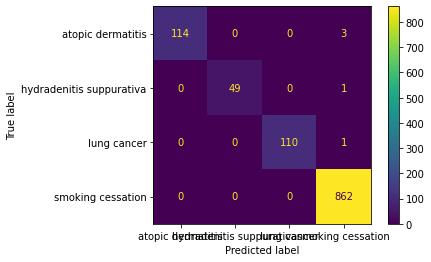

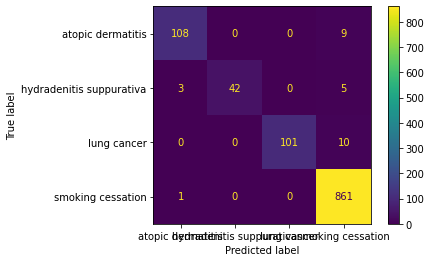

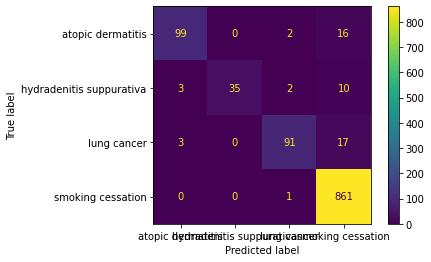

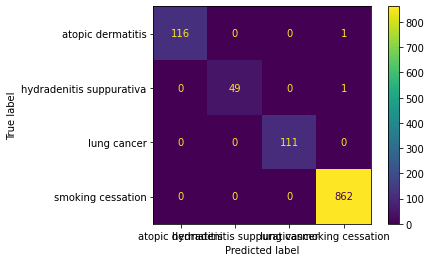

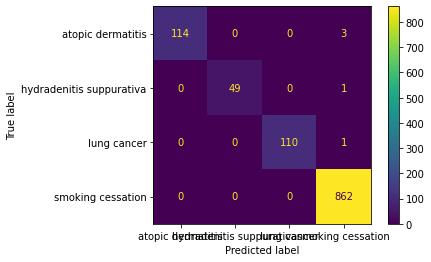

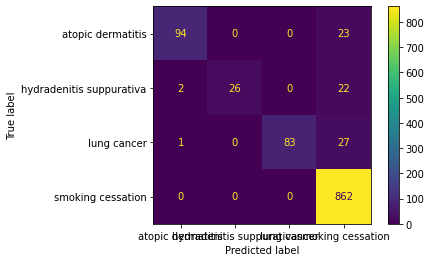

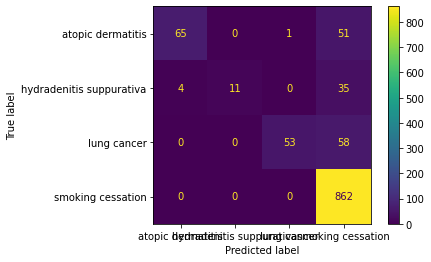

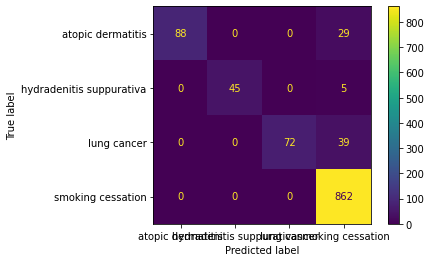

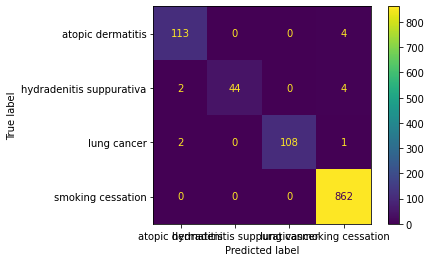

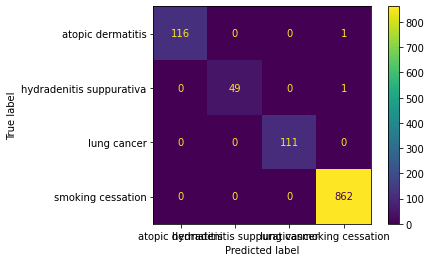

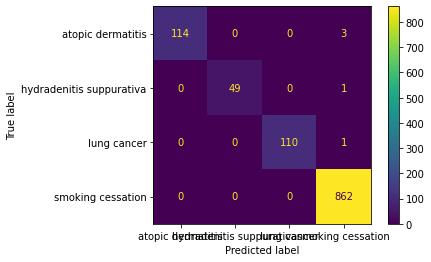

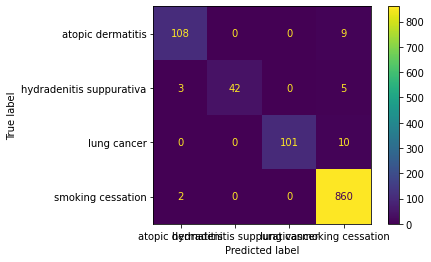

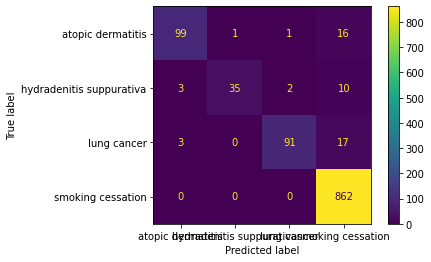

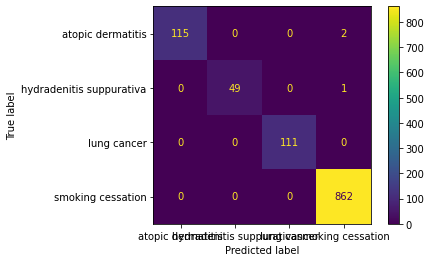

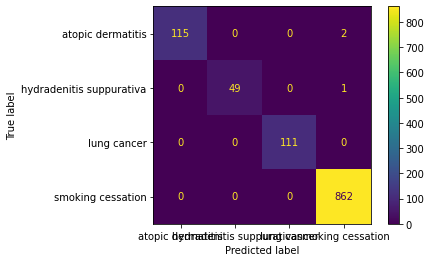

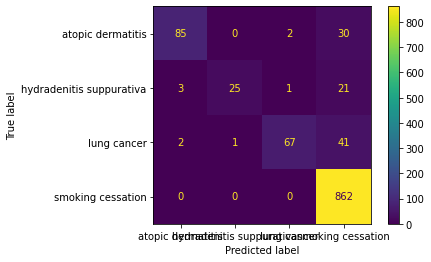

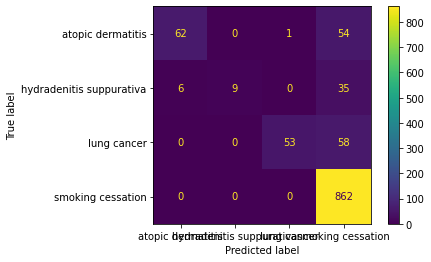

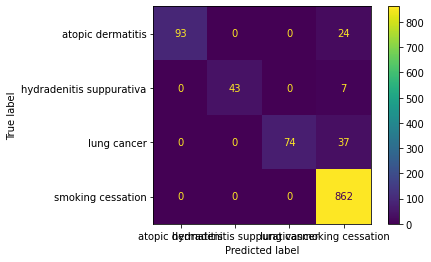

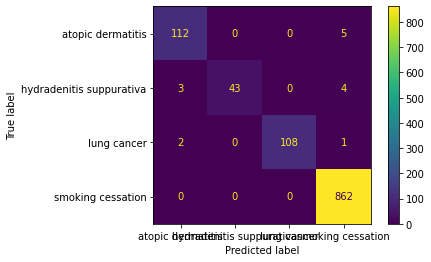

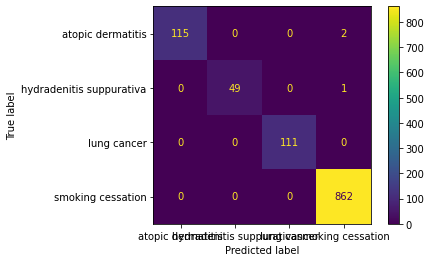

In [ ]:
for index, row in new_model_results_df.iterrows():
  row['conf matrices display'].plot()

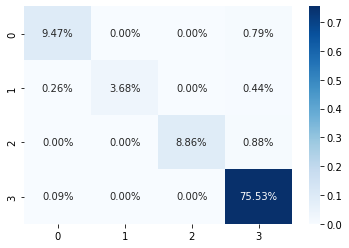

In [ ]:
cm = new_model_results_df['conf matrices'][1]
sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap='Blues')

In [ ]:
new_model_results_df.iloc[: , :8].sort_values(by='best accuracy test', ascending=False)

,term type,model,measure,max measure,max features,best params,best accuracy train,best accuracy test
9,1 - word,MLPClassifier(),accuracy,0.927193,10000,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",0.9845,0.9982
3,1 - word,DecisionTreeClassifier(),accuracy,0.858772,10000,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.9845,0.9982
19,2 - word,MLPClassifier(),accuracy,0.924561,10000,"{'activation': 'relu', 'alpha': 0.001, 'early_...",0.9842,0.9974
14,2 - word,"(DecisionTreeClassifier(max_features='auto', r...",accuracy,0.896491,10000,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9842,0.9974
13,2 - word,DecisionTreeClassifier(),accuracy,0.859649,10000,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.9842,0.9974
0,1 - word,LogisticRegression(),accuracy,0.874561,4000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9813,0.9956
4,1 - word,"(DecisionTreeClassifier(max_features='auto', r...",accuracy,0.897368,4000,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9819,0.9956
10,2 - word,LogisticRegression(),accuracy,0.871930,4000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9810,0.9956
8,1 - word,"VotingClassifier(estimators=[('LR', LogisticRe...",accuracy,0.872807,4000,"{'n_jobs': -1, 'voting': 'hard'}",0.9710,0.9886
18,2 - word,"VotingClassifier(estimators=[('LR', LogisticRe...",accuracy,0.873684,4000,"{'n_jobs': -1, 'voting': 'hard'}",0.9681,0.9868


In [ ]:
t2 = time.perf_counter()
print('Seconds taken to run:', round(t2-t1, 0))
print('Minutes taken to run:', round((t2-t1)/60, 0))
print('Hours taken to run:', round((t2-t1)/3600, 2))
# around 4 hours

### **Conclusions**:

4500 samples - much slower. even though the changes:
*   train with TERM_NUMBER_LIST = [500, 1000, 4000, 10000]
*   without word-3 (trigram)
*   without AdaBoost

Feature selection:
*   Best - MLP, LR, Bagging.
*   Much more features - 4000 or more (many 10000).
*   lower accuracy beacause of more classes - 92% top.
*   

Parameter Tuning
*   Best - MLP, DT, LR.
*   Great improvment - 99.8% accuracy.

**Generally - Classic models are strong and can handle imbalanced data**.


